In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
# reading the CSV file and head of data frame
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# There are no null values, so moving further

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike.set_index('instant', inplace = True)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Lets check the pairplot now for all dataset

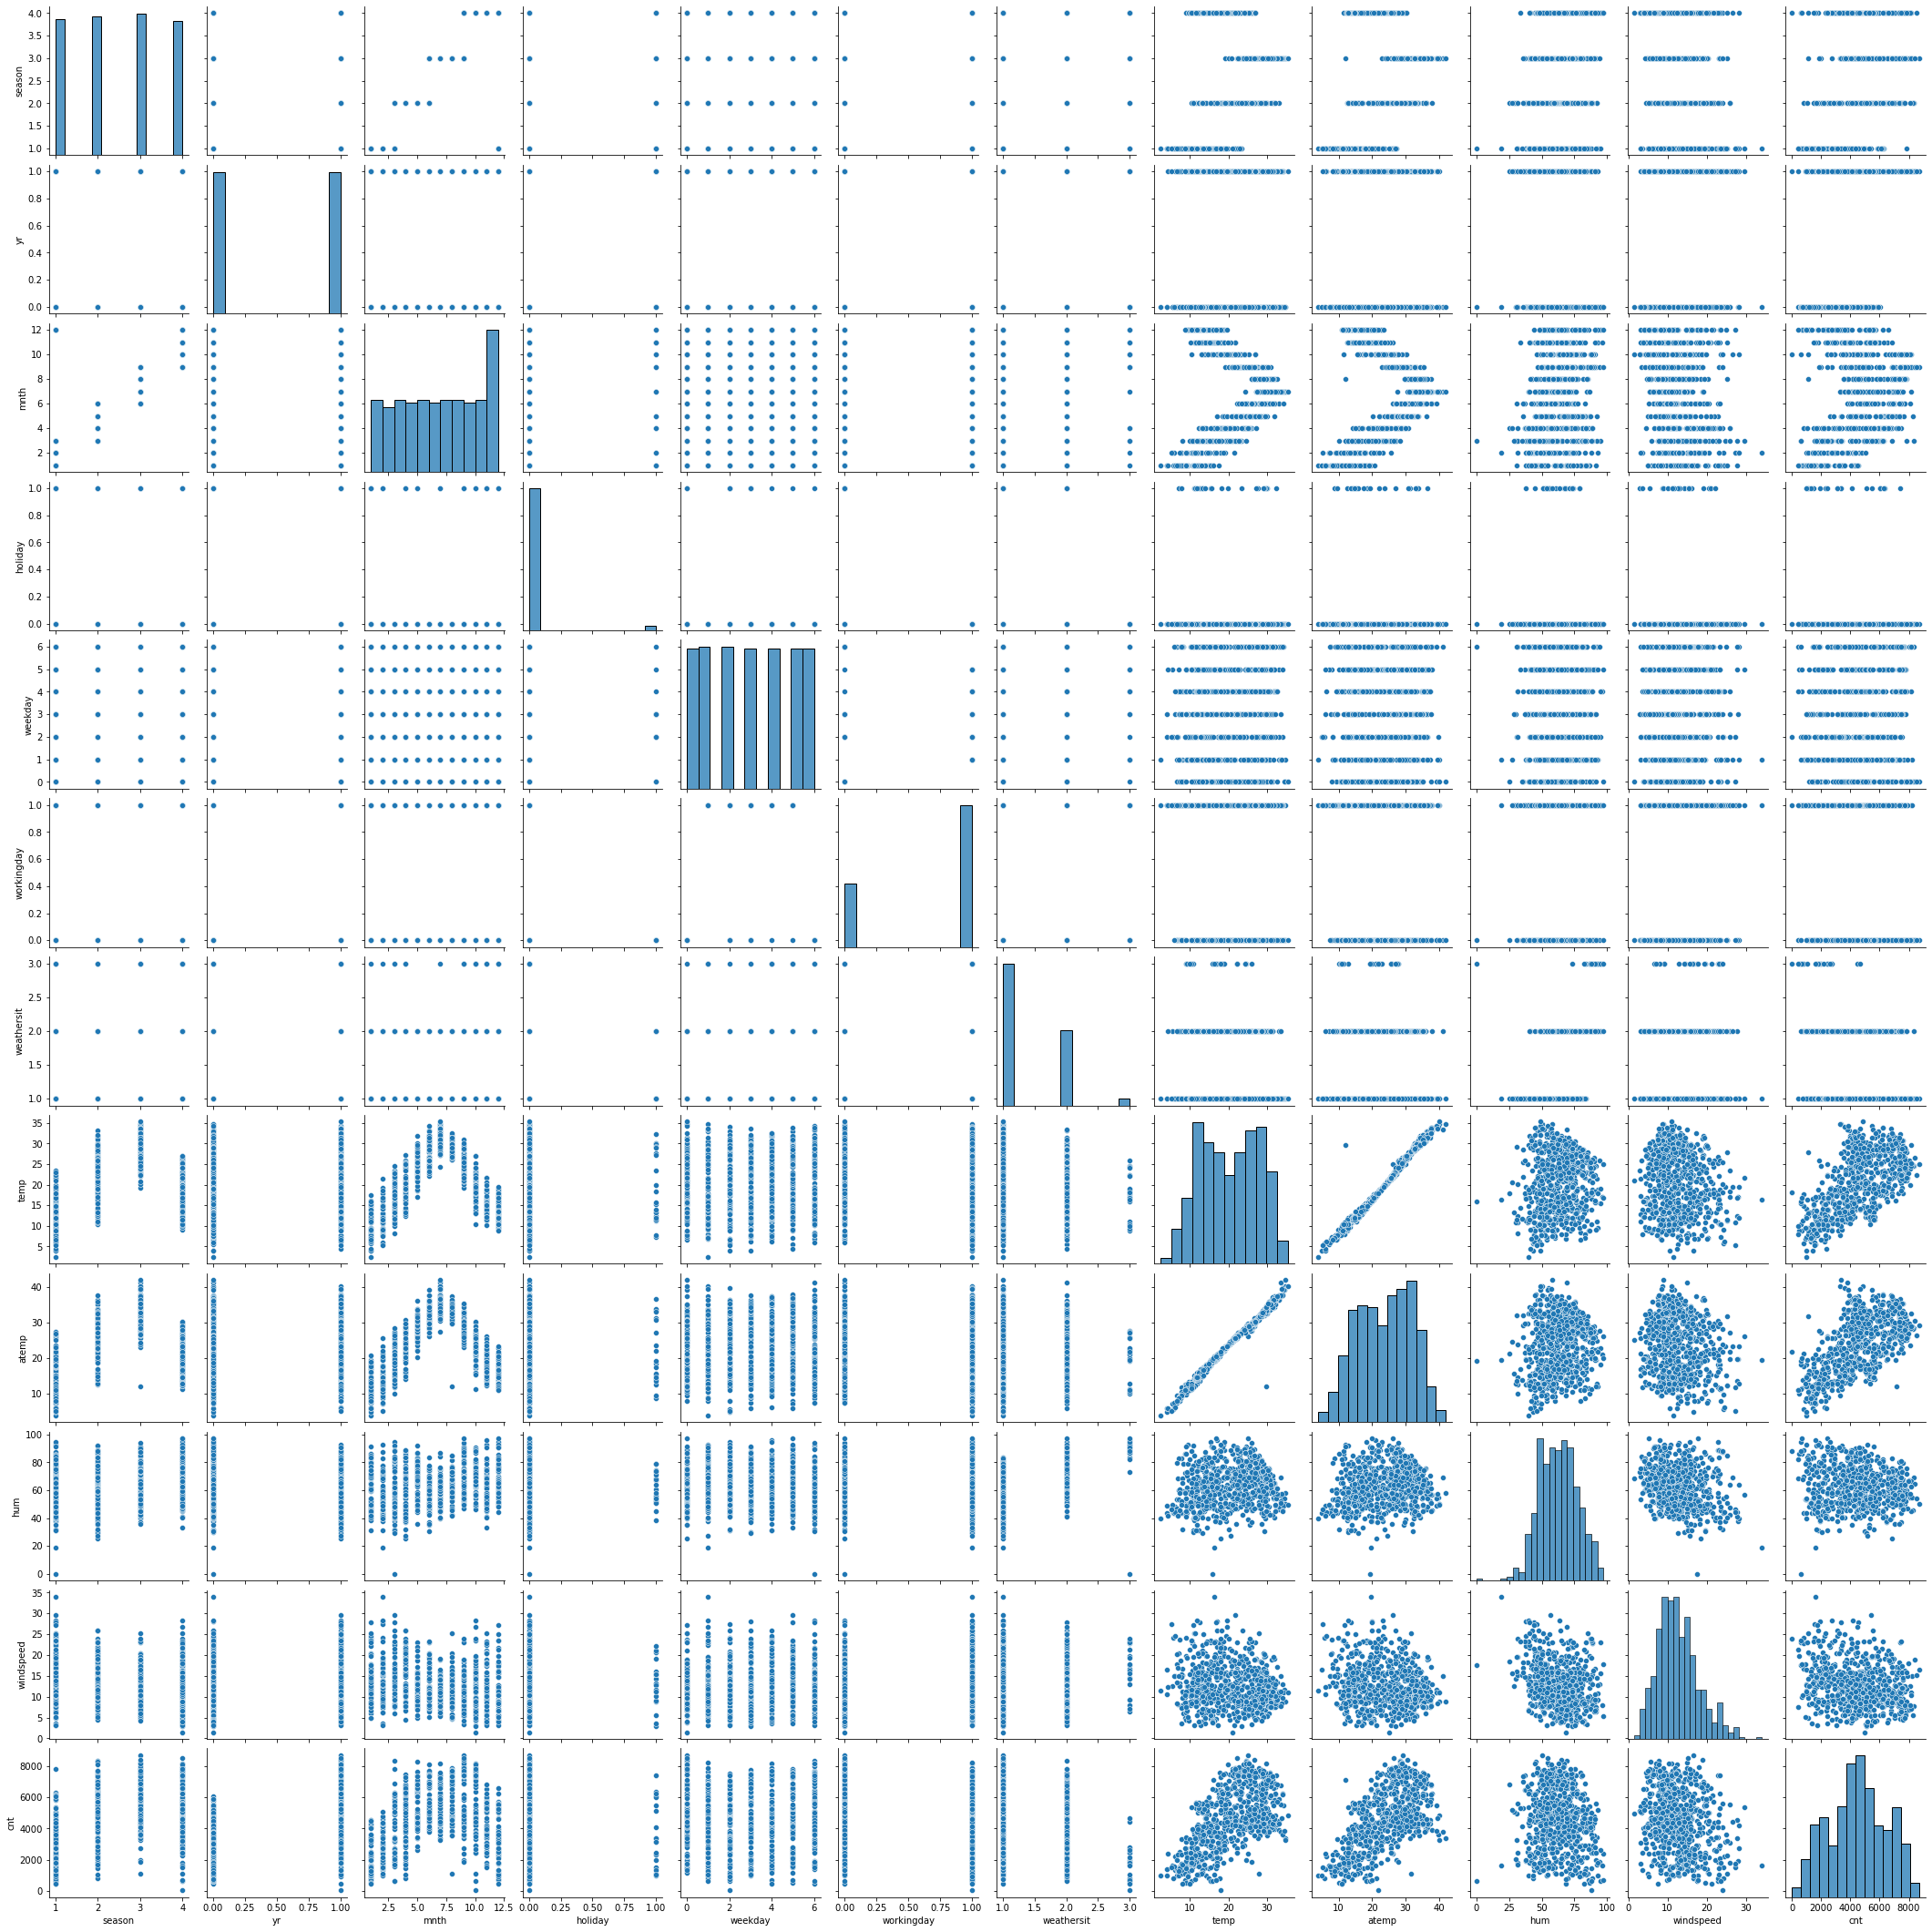

In [12]:
sns.pairplot(bike)
plt.show()

# casual and registered are not mandatory, as they reflect in the cnt column

In [10]:
bike.drop(['casual', 'registered'], inplace=True, axis = 1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike.shape

(730, 13)

# dteday column should be changed and sorted for categorical variable

In [13]:
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['dteday'].dtypes

dtype('<M8[ns]')

In [14]:
import calendar
bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
bike['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [15]:
bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
bike['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [17]:
bike['workingday'].unique()

array([1, 0], dtype=int64)

In [18]:
bike['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 79.8+ KB


In [20]:
bike[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [21]:
bike[['season','weekday','weathersit']] = bike[['season','weekday','weathersit']].astype(str)

In [22]:
# Converting the weather variable into more understanable text
bike['weathersit'].replace(['1','2','3'],['Good', 'Average', 'Bad'], inplace=True)

In [23]:
bike['weathersit'].unique()

array(['Average', 'Good', 'Bad'], dtype=object)

In [24]:
# Converting the seasons into specific season names for better understanding
bike['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

In [25]:
bike['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

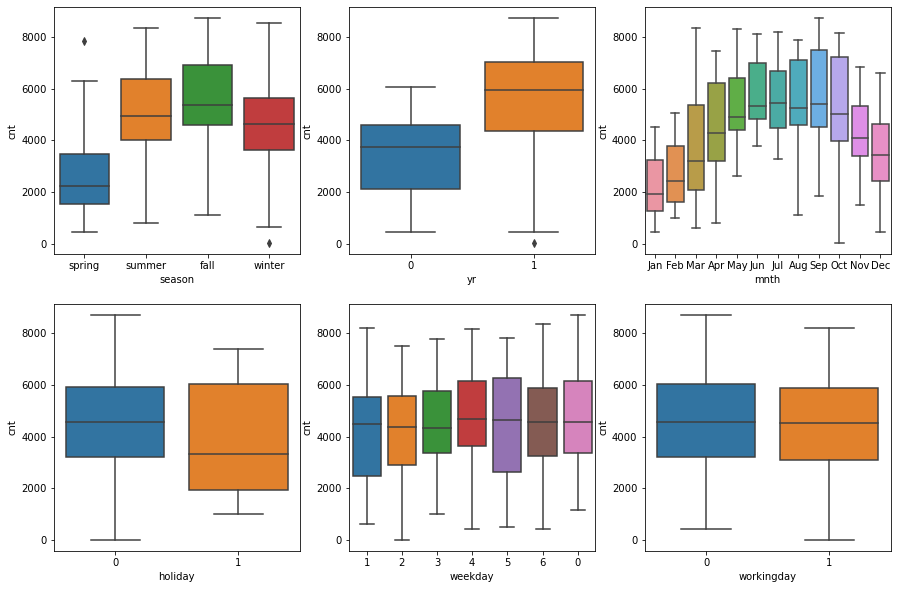

In [26]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.show()

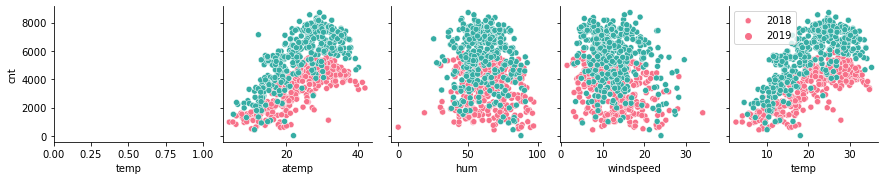

In [27]:
# Checking linear relationship between the cnt variable and other numeric variables
x =sns.pairplot(bike, palette='husl', x_vars=['temp', 'atemp', 'hum', 'windspeed', 'temp'], y_vars=['cnt'] , hue='yr' )
x._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

# categorical columns will be provided with dummies now

In [28]:
dummy = pd.get_dummies(bike[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
bike = pd.concat([bike,dummy], axis=1)   #Axis=1 is for horizontal stacking
bike = bike.drop(['season','mnth','weekday','weathersit'], axis=1)
bike.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,1
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,1
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,1


In [30]:
# Moving the cnt to the end for easier identification
first_col = bike.pop('cnt')
bike['cnt'] = first_col

In [31]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
bike.drop('dteday', inplace=True, axis = 1)

In [32]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [33]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,1,0,0,0,0,1,7216
427,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,0,0,0,0,0,0,4066
729,1,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,1,0,0,0,0,0,0,1,1796
483,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,0,0,0,0,0,0,4220
112,0,0,0,13.803347,16.0977,72.9583,14.707907,0,1,0,...,0,0,0,0,0,0,0,0,0,1683


In [34]:
df_train.shape

(510, 30)

In [35]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,29.793347,33.27085,63.7917,5.459106,0,0,0,...,0,0,0,1,0,0,0,0,0,6043
536,1,0,1,32.082500,36.04875,59.2083,7.625404,0,1,0,...,0,0,0,0,1,0,0,0,1,6211
300,0,0,0,19.270000,22.85230,81.2917,13.250121,0,0,1,...,0,0,0,0,0,0,1,0,0,2659
222,0,0,1,31.433347,34.24915,42.4167,13.417286,0,0,0,...,0,0,0,0,0,1,0,0,1,4780
153,0,0,0,29.315000,32.19710,30.5000,19.583229,0,1,0,...,0,0,0,0,0,0,1,0,1,4968


In [36]:
df_test.shape

(220, 30)

# sincethe values of all columns does not have min max as 0 and 1 , better to scale it for easy evaluation

In [37]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,0.243137,0.247059,0.247059,...,0.080392,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.029412,0.625490,4485.337255
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,0.429398,0.431725,0.431725,...,0.272166,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.169124,0.484471,1950.666077
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3120.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4530.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5973.500000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


In [38]:
Scaler = MinMaxScaler()

In [39]:
colms = df_train.columns
df_train[colms] = Scaler.fit_transform(df_train[colms])

In [40]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.827658
427,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465255
729,1.0,0.0,1.0,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.204096
483,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482973
112,0.0,0.0,0.0,0.345824,0.318819,0.751824,0.380981,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191095


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,...,0.080392,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.029412,0.625490,0.513499
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,...,0.272166,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.169124,0.484471,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Min and Max values are 0 and 1. So we can proceed further and watch the corelation

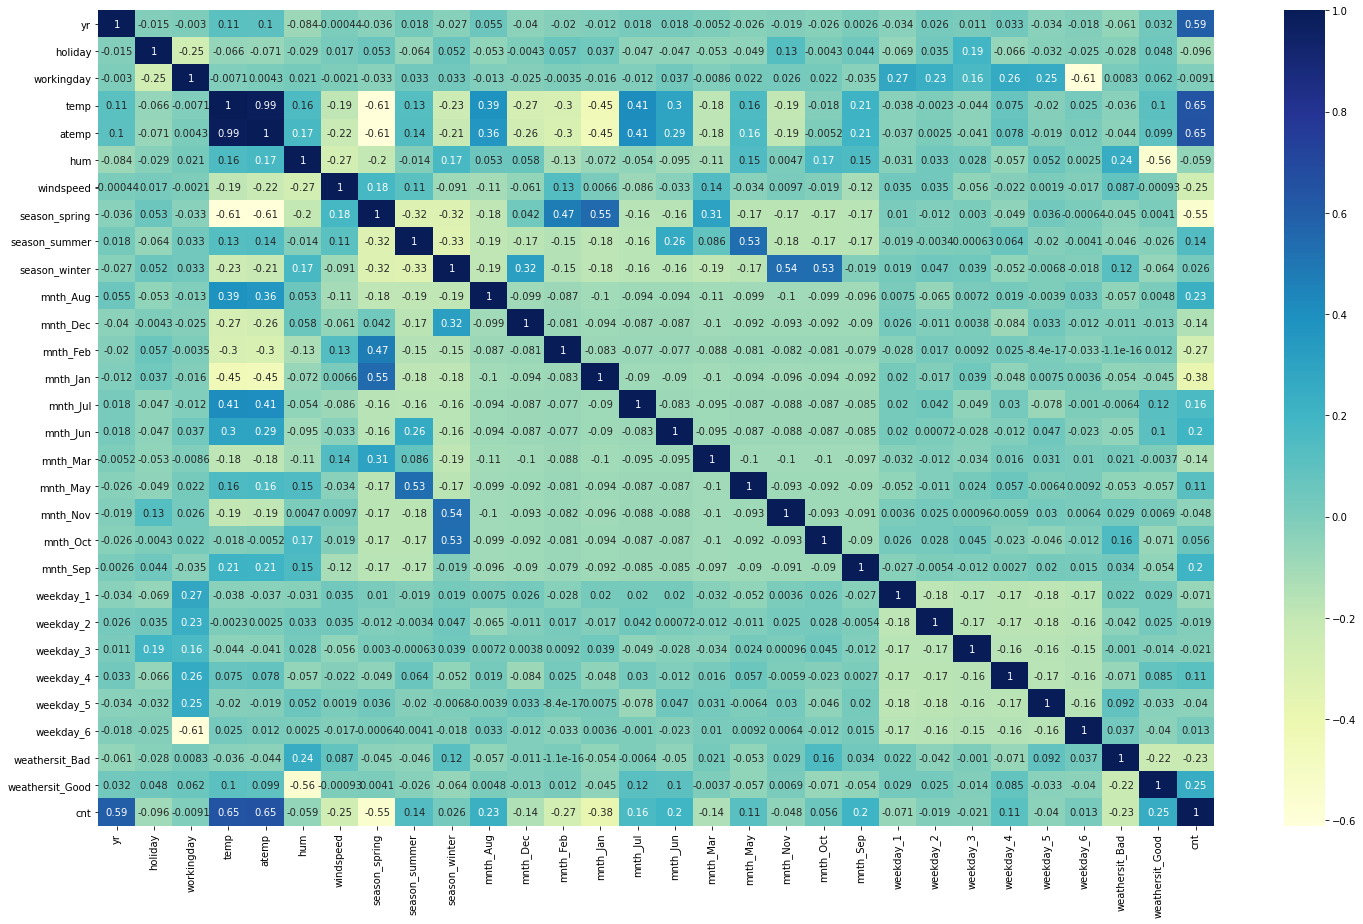

In [42]:
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

We can see that yr, temp and atemp have high collinearity. This will be seen while dropping the columns...

In [43]:
# now all the columns will be added and removed by seeing R2, p value and VIF....

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.24e-177
Time:                        22:26:40   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2838      0.047      6.021      0.000       0.191       0.376
yr                  0.2312      0.008     28.360      0.000       0.215       0.247
holiday            -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday         -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                0.3873      0.143      2.699      0.007       0.105       0.669
atemp               0.0547      0.139      0.392      0.695      -0.219       0.329
hum                -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed          -0.1802      0.027     -6.751      0.000      -0.233      -0.128
season_spring      -0.0409      0.030     -1.349      0.178      -0.100       0.019
season_summer       0.0458      0.026      1.733      0.084      -0.006       0.098
season_winter       0.1121      0.028      3.969      0.000       0.057       0.168
mnth_Aug            0.0291      0.034      0.849      0.396      -0.038       0.096
mnth_Dec           -0.0444      0.034     -1.308      0.191      -0.111       0.022
mnth_Feb           -0.0373      0.033     -1.119      0.264      -0.103       0.028
mnth_Jan           -0.0640      0.034     -1.887      0.060      -0.131       0.003
mnth_Jul           -0.0274      0.035     -0.773      0.440      -0.097       0.042
mnth_Jun            0.0097      0.025      0.384      0.701      -0.040       0.059
mnth_Mar            0.0010      0.025      0.041      0.967      -0.048       0.050
mnth_May            0.0256      0.021      1.196      0.232      -0.016       0.068
mnth_Nov           -0.0395      0.037     -1.076      0.282      -0.112       0.033
mnth_Oct            0.0058      0.036      0.159      0.874      -0.065       0.077
mnth_Sep            0.0916      0.032      2.837      0.005       0.028       0.155
weekday_1           0.0252      0.072      0.352      0.725      -0.116       0.166
weekday_2           0.0238      0.071      0.333      0.739      -0.116       0.164
weekday_3           0.0396      0.071      0.560      0.576      -0.100       0.179
weekday_4           0.0541      0.072      0.753      0.452      -0.087       0.195
weekday_5           0.0499      0.072      0.696      0.487      -0.091       0.191
weekday_6          -0.0058      0.015     -0.378      0.706      -0.036       0.025
weathersit_Bad     -0.1914      0.025     -7.569      0.000      -0.241      -0.142
weathersit_Good     0.0578      0.011      5.486      0.000       0.037       0.079
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59

In [45]:
#VIF values should be checked now
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,438.82
4,atemp,382.21
2,workingday,229.65
21,weekday_1,50.78
22,weekday_2,49.61
25,weekday_5,48.16
24,weekday_4,47.09
23,weekday_3,43.27
5,hum,34.56
7,season_spring,12.18


..Now all the VIF Values less than 5 should be used and rest should be removed
..But first lets remove the values with high P values

In [46]:
# 'mnth_Mar' has high P-Value
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.24e-178
Time:                        22:27:16   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2844      0.044      6.420      0.000       0.197       0.371
yr                  0.2312      0.008     28.389      0.000       0.215       0.247
holiday            -0.1345      0.065     -2.056      0.040      -0.263      -0.006
workingday         -0.0605      0.071     -0.850      0.396      -0.200       0.079
temp                0.3871      0.143      2.702      0.007       0.106       0.669
atemp               0.0545      0.139      0.392      0.695      -0.219       0.328
hum                -0.1577      0.039     -4.064      0.000      -0.234      -0.081
windspeed          -0.1803      0.027     -6.769      0.000      -0.233      -0.128
season_spring      -0.0405      0.029     -1.413      0.158      -0.097       0.016
season_summer       0.0456      0.026      1.759      0.079      -0.005       0.097
season_winter       0.1123      0.028      4.052      0.000       0.058       0.167
mnth_Aug            0.0286      0.032      0.886      0.376      -0.035       0.092
mnth_Dec           -0.0453      0.026     -1.725      0.085      -0.097       0.006
mnth_Feb           -0.0383      0.023     -1.702      0.089      -0.083       0.006
mnth_Jan           -0.0651      0.023     -2.882      0.004      -0.109      -0.021
mnth_Jul           -0.0278      0.034     -0.824      0.410      -0.094       0.038
mnth_Jun            0.0094      0.024      0.392      0.695      -0.038       0.056
mnth_May            0.0252      0.020      1.264      0.207      -0.014       0.064
mnth_Nov           -0.0404      0.031     -1.297      0.195      -0.101       0.021
mnth_Oct            0.0050      0.031      0.161      0.872      -0.056       0.066
mnth_Sep            0.0910      0.029      3.106      0.002       0.033       0.149
weekday_1           0.0252      0.072      0.351      0.725      -0.116       0.166
weekday_2           0.0237      0.071      0.333      0.739      -0.116       0.164
weekday_3           0.0396      0.071      0.560      0.576      -0.099       0.179
weekday_4           0.0541      0.072      0.753      0.452      -0.087       0.195
weekday_5           0.0499      0.072      0.696      0.487      -0.091       0.191
weekday_6          -0.0059      0.015     -0.379      0.705      -0.036       0.025
weathersit_Bad     -0.1914      0.025     -7.577      0.000      -0.241      -0.142
weathersit_Good     0.0578      0.011      5.493      0.000       0.037       0.078
==============================================================================
Omnibus:                       78.698   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.896
Skew:                          -0.767   Prob(JB):                     7.18e-46
Kurtosis:                       5.726   Cond. No.                         96.2


In [47]:
# 'weekday_4' has high P-Value
X = X.drop('weekday_4',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.62e-179
Time:                        22:27:22   Log-Likelihood:                 522.77
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     482   BIC:                            -871.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2838      0.044      6.409      0.000       0.197       0.371
yr                  0.2316      0.008     28.494      0.000       0.216       0.248
holiday            -0.0906      0.030     -3.064      0.002      -0.149      -0.032
workingday         -0.0081      0.015     -0.539      0.590      -0.038       0.021
temp                0.3901      0.143      2.725      0.007       0.109       0.671
atemp               0.0531      0.139      0.382      0.703      -0.220       0.327
hum                -0.1569      0.039     -4.046      0.000      -0.233      -0.081
windspeed          -0.1810      0.027     -6.803      0.000      -0.233      -0.129
season_spring      -0.0403      0.029     -1.407      0.160      -0.097       0.016
season_summer       0.0458      0.026      1.768      0.078      -0.005       0.097
season_winter       0.1116      0.028      4.031      0.000       0.057       0.166
mnth_Aug            0.0279      0.032      0.866      0.387      -0.035       0.091
mnth_Dec           -0.0447      0.026     -1.703      0.089      -0.096       0.007
mnth_Feb           -0.0377      0.022     -1.675      0.095      -0.082       0.007
mnth_Jan           -0.0646      0.023     -2.864      0.004      -0.109      -0.020
mnth_Jul           -0.0285      0.034     -0.846      0.398      -0.095       0.038
mnth_Jun            0.0087      0.024      0.363      0.717      -0.038       0.056
mnth_May            0.0247      0.020      1.237      0.217      -0.015       0.064
mnth_Nov           -0.0412      0.031     -1.326      0.185      -0.102       0.020
mnth_Oct            0.0056      0.031      0.180      0.857      -0.055       0.066
mnth_Sep            0.0910      0.029      3.108      0.002       0.033       0.149
weekday_1          -0.0276      0.015     -1.889      0.059      -0.056       0.001
weekday_2          -0.0288      0.015     -1.976      0.049      -0.057      -0.000
weekday_3          -0.0125      0.015     -0.820      0.413      -0.042       0.017
weekday_5          -0.0029      0.015     -0.195      0.846      -0.032       0.026
weekday_6          -0.0070      0.015     -0.458      0.647      -0.037       0.023
weathersit_Bad     -0.1915      0.025     -7.583      0.000      -0.241      -0.142
weathersit_Good     0.0578      0.011      5.496      0.000       0.037       0.078
==============================================================================
Omnibus:                       78.786   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.554
Skew:                          -0.774   Prob(JB):                     3.82e-45
Kurtosis:                       5.689   Cond. No.                         95.8
==============================================================================

Note

In [48]:
# 'mnth_Oct' has high P-Value
X = X.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
lr_model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.59e-180
Time:                        22:27:30   Log-Likelihood:                 522.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     483   BIC:                            -877.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2851      0.044      6.534      0.000       0.199       0.371
yr                  0.2315      0.008     28.544      0.000       0.216       0.247
holiday            -0.0902      0.029     -3.062      0.002      -0.148      -0.032
workingday         -0.0081      0.015     -0.540      0.589      -0.038       0.021
temp                0.3906      0.143      2.732      0.007       0.110       0.671
atemp               0.0532      0.139      0.382      0.702      -0.220       0.326
hum                -0.1562      0.039     -4.052      0.000      -0.232      -0.080
windspeed          -0.1808      0.027     -6.808      0.000      -0.233      -0.129
season_spring      -0.0414      0.028     -1.477      0.140      -0.096       0.014
season_summer       0.0440      0.024      1.840      0.066      -0.003       0.091
season_winter       0.1140      0.024      4.657      0.000       0.066       0.162
mnth_Aug            0.0257      0.030      0.864      0.388      -0.033       0.084
mnth_Dec           -0.0481      0.019     -2.582      0.010      -0.085      -0.011
mnth_Feb           -0.0386      0.022     -1.761      0.079      -0.082       0.004
mnth_Jan           -0.0655      0.022     -2.975      0.003      -0.109      -0.022
mnth_Jul           -0.0308      0.031     -0.983      0.326      -0.092       0.031
mnth_Jun            0.0076      0.023      0.329      0.742      -0.038       0.053
mnth_May            0.0243      0.020      1.226      0.221      -0.015       0.063
mnth_Nov           -0.0456      0.019     -2.374      0.018      -0.083      -0.008
mnth_Sep            0.0883      0.025      3.533      0.000       0.039       0.137
weekday_1          -0.0275      0.015     -1.884      0.060      -0.056       0.001
weekday_2          -0.0288      0.015     -1.979      0.048      -0.057      -0.000
weekday_3          -0.0124      0.015     -0.818      0.414      -0.042       0.017
weekday_5          -0.0029      0.015     -0.196      0.844      -0.032       0.026
weekday_6          -0.0070      0.015     -0.455      0.649      -0.037       0.023
weathersit_Bad     -0.1913      0.025     -7.589      0.000      -0.241      -0.142
weathersit_Good     0.0579      0.011      5.508      0.000       0.037       0.079
==============================================================================
Omnibus:                       78.159   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.622
Skew:                          -0.770   Prob(JB):                     1.65e-44
Kurtosis:                       5.668   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [49]:
# 'mnth_Jun' has high P-Value
X = X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.58e-181
Time:                        22:27:34   Log-Likelihood:                 522.69
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     484   BIC:                            -883.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2859      0.044      6.569      0.000       0.200       0.371
yr                  0.2313      0.008     28.658      0.000       0.215       0.247
holiday            -0.0910      0.029     -3.102      0.002      -0.149      -0.033
workingday         -0.0082      0.015     -0.550      0.583      -0.038       0.021
temp                0.4046      0.136      2.968      0.003       0.137       0.672
atemp               0.0469      0.138      0.341      0.733      -0.223       0.317
hum                -0.1579      0.038     -4.137      0.000      -0.233      -0.083
windspeed          -0.1820      0.026     -6.922      0.000      -0.234      -0.130
season_spring      -0.0438      0.027     -1.625      0.105      -0.097       0.009
season_summer       0.0428      0.024      1.812      0.071      -0.004       0.089
season_winter       0.1113      0.023      4.829      0.000       0.066       0.157
mnth_Aug            0.0199      0.024      0.830      0.407      -0.027       0.067
mnth_Dec           -0.0472      0.018     -2.564      0.011      -0.083      -0.011
mnth_Feb           -0.0375      0.022     -1.734      0.084      -0.080       0.005
mnth_Jan           -0.0639      0.021     -2.977      0.003      -0.106      -0.022
mnth_Jul           -0.0370      0.025     -1.482      0.139      -0.086       0.012
mnth_May            0.0212      0.017      1.213      0.226      -0.013       0.056
mnth_Nov           -0.0451      0.019     -2.357      0.019      -0.083      -0.008
mnth_Sep            0.0842      0.022      3.890      0.000       0.042       0.127
weekday_1          -0.0271      0.015     -1.866      0.063      -0.056       0.001
weekday_2          -0.0286      0.015     -1.968      0.050      -0.057    -4.1e-05
weekday_3          -0.0122      0.015     -0.806      0.421      -0.042       0.018
weekday_5          -0.0027      0.015     -0.181      0.857      -0.032       0.026
weekday_6          -0.0071      0.015     -0.462      0.644      -0.037       0.023
weathersit_Bad     -0.1915      0.025     -7.606      0.000      -0.241      -0.142
weathersit_Good     0.0577      0.010      5.503      0.000       0.037       0.078
==============================================================================
Omnibus:                       77.604   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.774
Skew:                          -0.769   Prob(JB):                     1.13e-43
Kurtosis:                       5.635   Cond. No.                         93.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# 'weekday_3' has high P-Value
X = X.drop('weekday_3',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.02e-182
Time:                        22:27:38   Log-Likelihood:                 522.35
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     485   BIC:                            -888.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2854      0.044      6.561      0.000       0.200       0.371
yr                  0.2312      0.008     28.663      0.000       0.215       0.247
holiday            -0.0995      0.027     -3.630      0.000      -0.153      -0.046
workingday         -0.0139      0.013     -1.048      0.295      -0.040       0.012
temp                0.4046      0.136      2.970      0.003       0.137       0.672
atemp               0.0478      0.138      0.348      0.728      -0.222       0.318
hum                -0.1586      0.038     -4.157      0.000      -0.234      -0.084
windspeed          -0.1814      0.026     -6.905      0.000      -0.233      -0.130
season_spring      -0.0437      0.027     -1.623      0.105      -0.097       0.009
season_summer       0.0429      0.024      1.819      0.069      -0.003       0.089
season_winter       0.1110      0.023      4.819      0.000       0.066       0.156
mnth_Aug            0.0197      0.024      0.824      0.411      -0.027       0.067
mnth_Dec           -0.0474      0.018     -2.574      0.010      -0.084      -0.011
mnth_Feb           -0.0372      0.022     -1.722      0.086      -0.080       0.005
mnth_Jan           -0.0642      0.021     -2.993      0.003      -0.106      -0.022
mnth_Jul           -0.0368      0.025     -1.474      0.141      -0.086       0.012
mnth_May            0.0212      0.017      1.212      0.226      -0.013       0.056
mnth_Nov           -0.0443      0.019     -2.318      0.021      -0.082      -0.007
mnth_Sep            0.0844      0.022      3.903      0.000       0.042       0.127
weekday_1          -0.0214      0.013     -1.688      0.092      -0.046       0.004
weekday_2          -0.0228      0.013     -1.806      0.072      -0.048       0.002
weekday_5           0.0031      0.013      0.241      0.810      -0.022       0.029
weekday_6          -0.0069      0.015     -0.447      0.655      -0.037       0.023
weathersit_Bad     -0.1922      0.025     -7.639      0.000      -0.242      -0.143
weathersit_Good     0.0579      0.010      5.532      0.000       0.037       0.078
==============================================================================
Omnibus:                       77.948   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.858
Skew:                          -0.768   Prob(JB):                     2.42e-44
Kurtosis:                       5.663   Cond. No.                         92.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# 'atemp' has high P-Value
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.94e-183
Time:                        22:27:42   Log-Likelihood:                 522.29
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     486   BIC:                            -895.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2852      0.043      6.563      0.000       0.200       0.371
yr                  0.2312      0.008     28.687      0.000       0.215       0.247
holiday            -0.0998      0.027     -3.650      0.000      -0.154      -0.046
workingday         -0.0138      0.013     -1.045      0.296      -0.040       0.012
temp                0.4501      0.039     11.610      0.000       0.374       0.526
hum                -0.1579      0.038     -4.148      0.000      -0.233      -0.083
windspeed          -0.1833      0.026     -7.122      0.000      -0.234      -0.133
season_spring      -0.0430      0.027     -1.602      0.110      -0.096       0.010
season_summer       0.0437      0.023      1.861      0.063      -0.002       0.090
season_winter       0.1118      0.023      4.883      0.000       0.067       0.157
mnth_Aug            0.0191      0.024      0.800      0.424      -0.028       0.066
mnth_Dec           -0.0473      0.018     -2.573      0.010      -0.083      -0.011
mnth_Feb           -0.0373      0.022     -1.726      0.085      -0.080       0.005
mnth_Jan           -0.0644      0.021     -3.007      0.003      -0.107      -0.022
mnth_Jul           -0.0368      0.025     -1.475      0.141      -0.086       0.012
mnth_May            0.0210      0.017      1.201      0.231      -0.013       0.055
mnth_Nov           -0.0442      0.019     -2.317      0.021      -0.082      -0.007
mnth_Sep            0.0845      0.022      3.908      0.000       0.042       0.127
weekday_1          -0.0214      0.013     -1.691      0.091      -0.046       0.003
weekday_2          -0.0228      0.013     -1.807      0.071      -0.048       0.002
weekday_5           0.0031      0.013      0.237      0.813      -0.022       0.029
weekday_6          -0.0072      0.015     -0.471      0.638      -0.037       0.023
weathersit_Bad     -0.1927      0.025     -7.684      0.000      -0.242      -0.143
weathersit_Good     0.0580      0.010      5.545      0.000       0.037       0.079
==============================================================================
Omnibus:                       77.431   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.407
Skew:                          -0.764   Prob(JB):                     5.00e-44
Kurtosis:                       5.655   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# 'weekday_5' has high P-Value
X = X.drop('weekday_5',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.76e-184
Time:                        22:27:46   Log-Likelihood:                 522.26
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     487   BIC:                            -901.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2850      0.043      6.566      0.000       0.200       0.370
yr                  0.2311      0.008     28.722      0.000       0.215       0.247
holiday            -0.0994      0.027     -3.646      0.000      -0.153      -0.046
workingday         -0.0127      0.012     -1.027      0.305      -0.037       0.012
temp                0.4505      0.039     11.643      0.000       0.374       0.527
hum                -0.1577      0.038     -4.148      0.000      -0.232      -0.083
windspeed          -0.1831      0.026     -7.125      0.000      -0.234      -0.133
season_spring      -0.0430      0.027     -1.602      0.110      -0.096       0.010
season_summer       0.0435      0.023      1.856      0.064      -0.003       0.090
season_winter       0.1115      0.023      4.882      0.000       0.067       0.156
mnth_Aug            0.0188      0.024      0.790      0.430      -0.028       0.066
mnth_Dec           -0.0470      0.018     -2.565      0.011      -0.083      -0.011
mnth_Feb           -0.0374      0.022     -1.733      0.084      -0.080       0.005
mnth_Jan           -0.0644      0.021     -3.009      0.003      -0.106      -0.022
mnth_Jul           -0.0372      0.025     -1.498      0.135      -0.086       0.012
mnth_May            0.0208      0.017      1.195      0.233      -0.013       0.055
mnth_Nov           -0.0439      0.019     -2.309      0.021      -0.081      -0.007
mnth_Sep            0.0844      0.022      3.909      0.000       0.042       0.127
weekday_1          -0.0225      0.012     -1.906      0.057      -0.046       0.001
weekday_2          -0.0239      0.012     -2.015      0.044      -0.047      -0.001
weekday_6          -0.0072      0.015     -0.474      0.636      -0.037       0.023
weathersit_Bad     -0.1922      0.025     -7.698      0.000      -0.241      -0.143
weathersit_Good     0.0579      0.010      5.546      0.000       0.037       0.078
==============================================================================
Omnibus:                       77.222   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.645
Skew:                          -0.762   Prob(JB):                     7.33e-44
Kurtosis:                       5.650   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# 'mnth_Aug' has high P-Value
X = X.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.07e-185
Time:                        22:27:51   Log-Likelihood:                 521.93
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     488   BIC:                            -906.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2958      0.041      7.179      0.000       0.215       0.377
yr                  0.2313      0.008     28.770      0.000       0.216       0.247
holiday            -0.0998      0.027     -3.663      0.000      -0.153      -0.046
workingday         -0.0127      0.012     -1.026      0.305      -0.037       0.012
temp                0.4527      0.039     11.736      0.000       0.377       0.529
hum                -0.1564      0.038     -4.118      0.000      -0.231      -0.082
windspeed          -0.1833      0.026     -7.134      0.000      -0.234      -0.133
season_spring      -0.0550      0.022     -2.490      0.013      -0.098      -0.012
season_summer       0.0308      0.017      1.806      0.072      -0.003       0.064
season_winter       0.1004      0.018      5.582      0.000       0.065       0.136
mnth_Dec           -0.0479      0.018     -2.622      0.009      -0.084      -0.012
mnth_Feb           -0.0374      0.022     -1.733      0.084      -0.080       0.005
mnth_Jan           -0.0644      0.021     -3.010      0.003      -0.106      -0.022
mnth_Jul           -0.0506      0.018     -2.785      0.006      -0.086      -0.015
mnth_May            0.0204      0.017      1.171      0.242      -0.014       0.055
mnth_Nov           -0.0451      0.019     -2.382      0.018      -0.082      -0.008
mnth_Sep            0.0736      0.017      4.390      0.000       0.041       0.107
weekday_1          -0.0222      0.012     -1.881      0.061      -0.045       0.001
weekday_2          -0.0240      0.012     -2.028      0.043      -0.047      -0.001
weekday_6          -0.0069      0.015     -0.452      0.651      -0.037       0.023
weathersit_Bad     -0.1936      0.025     -7.774      0.000      -0.243      -0.145
weathersit_Good     0.0576      0.010      5.523      0.000       0.037       0.078
==============================================================================
Omnibus:                       78.360   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.391
Skew:                          -0.773   Prob(JB):                     1.86e-44
Kurtosis:                       5.662   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Removing 'workingday' due to high P-Value
X = X.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.93e-186
Time:                        22:27:55   Log-Likelihood:                 521.38
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     489   BIC:                            -911.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2877      0.040      7.113      0.000       0.208       0.367
yr                  0.2314      0.008     28.788      0.000       0.216       0.247
holiday            -0.0900      0.026     -3.527      0.000      -0.140      -0.040
temp                0.4528      0.039     11.737      0.000       0.377       0.529
hum                -0.1582      0.038     -4.170      0.000      -0.233      -0.084
windspeed          -0.1826      0.026     -7.111      0.000      -0.233      -0.132
season_spring      -0.0549      0.022     -2.487      0.013      -0.098      -0.012
season_summer       0.0306      0.017      1.797      0.073      -0.003       0.064
season_winter       0.1004      0.018      5.583      0.000       0.065       0.136
mnth_Dec           -0.0472      0.018     -2.586      0.010      -0.083      -0.011
mnth_Feb           -0.0375      0.022     -1.739      0.083      -0.080       0.005
mnth_Jan           -0.0646      0.021     -3.017      0.003      -0.107      -0.023
mnth_Jul           -0.0497      0.018     -2.739      0.006      -0.085      -0.014
mnth_May            0.0201      0.017      1.152      0.250      -0.014       0.054
mnth_Nov           -0.0462      0.019     -2.444      0.015      -0.083      -0.009
mnth_Sep            0.0739      0.017      4.405      0.000       0.041       0.107
weekday_1          -0.0254      0.011     -2.227      0.026      -0.048      -0.003
weekday_2          -0.0270      0.011     -2.359      0.019      -0.050      -0.005
weekday_6           0.0025      0.012      0.207      0.836      -0.021       0.026
weathersit_Bad     -0.1947      0.025     -7.826      0.000      -0.244      -0.146
weathersit_Good     0.0567      0.010      5.453      0.000       0.036       0.077
==============================================================================
Omnibus:                       74.630   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.924
Skew:                          -0.732   Prob(JB):                     4.71e-43
Kurtosis:                       5.651   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Removing 'weekday_6' due to high P-Value
X = X.drop('weekday_6',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          2.45e-187
Time:                        22:28:20   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2883      0.040      7.150      0.000       0.209       0.368
yr                  0.2314      0.008     28.820      0.000       0.216       0.247
holiday            -0.0902      0.025     -3.540      0.000      -0.140      -0.040
temp                0.4530      0.039     11.758      0.000       0.377       0.529
hum                -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed          -0.1827      0.026     -7.120      0.000      -0.233      -0.132
season_spring      -0.0548      0.022     -2.484      0.013      -0.098      -0.011
season_summer       0.0307      0.017      1.800      0.072      -0.003       0.064
season_winter       0.1004      0.018      5.589      0.000       0.065       0.136
mnth_Dec           -0.0472      0.018     -2.588      0.010      -0.083      -0.011
mnth_Feb           -0.0377      0.022     -1.749      0.081      -0.080       0.005
mnth_Jan           -0.0646      0.021     -3.021      0.003      -0.107      -0.023
mnth_Jul           -0.0497      0.018     -2.741      0.006      -0.085      -0.014
mnth_May            0.0201      0.017      1.153      0.249      -0.014       0.054
mnth_Nov           -0.0461      0.019     -2.442      0.015      -0.083      -0.009
mnth_Sep            0.0739      0.017      4.412      0.000       0.041       0.107
weekday_1          -0.0258      0.011     -2.318      0.021      -0.048      -0.004
weekday_2          -0.0275      0.011     -2.446      0.015      -0.050      -0.005
weathersit_Bad     -0.1945      0.025     -7.831      0.000      -0.243      -0.146
weathersit_Good     0.0566      0.010      5.454      0.000       0.036       0.077
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Removing 'mnth_May' due to high P-Value
X = X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.77e-188
Time:                        22:28:27   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2792      0.040      7.058      0.000       0.201       0.357
yr                  0.2309      0.008     28.790      0.000       0.215       0.247
holiday            -0.0909      0.025     -3.570      0.000      -0.141      -0.041
temp                0.4607      0.038     12.142      0.000       0.386       0.535
hum                -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed          -0.1841      0.026     -7.182      0.000      -0.234      -0.134
season_spring      -0.0515      0.022     -2.353      0.019      -0.094      -0.008
season_summer       0.0393      0.015      2.562      0.011       0.009       0.069
season_winter       0.1022      0.018      5.711      0.000       0.067       0.137
mnth_Dec           -0.0461      0.018     -2.527      0.012      -0.082      -0.010
mnth_Feb           -0.0365      0.022     -1.694      0.091      -0.079       0.006
mnth_Jan           -0.0631      0.021     -2.957      0.003      -0.105      -0.021
mnth_Jul           -0.0500      0.018     -2.760      0.006      -0.086      -0.014
mnth_Nov           -0.0447      0.019     -2.369      0.018      -0.082      -0.008
mnth_Sep            0.0739      0.017      4.410      0.000       0.041       0.107
weekday_1          -0.0264      0.011     -2.367      0.018      -0.048      -0.004
weekday_2          -0.0278      0.011     -2.477      0.014      -0.050      -0.006
weathersit_Bad     -0.1960      0.025     -7.898      0.000      -0.245      -0.147
weathersit_Good     0.0568      0.010      5.471      0.000       0.036       0.077
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Removing 'mnth_Feb' due to high P-Value
X = X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.21e-188
Time:                        22:28:32   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2674      0.039      6.854      0.000       0.191       0.344
yr                  0.2305      0.008     28.700      0.000       0.215       0.246
holiday            -0.0933      0.025     -3.662      0.000      -0.143      -0.043
temp                0.4771      0.037     12.975      0.000       0.405       0.549
hum                -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed          -0.1829      0.026     -7.124      0.000      -0.233      -0.132
season_spring      -0.0615      0.021     -2.912      0.004      -0.103      -0.020
season_summer       0.0427      0.015      2.803      0.005       0.013       0.073
season_winter       0.1040      0.018      5.810      0.000       0.069       0.139
mnth_Dec           -0.0366      0.017     -2.107      0.036      -0.071      -0.002
mnth_Jan           -0.0436      0.018     -2.421      0.016      -0.079      -0.008
mnth_Jul           -0.0510      0.018     -2.812      0.005      -0.087      -0.015
mnth_Nov           -0.0397      0.019     -2.128      0.034      -0.076      -0.003
mnth_Sep            0.0755      0.017      4.502      0.000       0.043       0.108
weekday_1          -0.0258      0.011     -2.309      0.021      -0.048      -0.004
weekday_2          -0.0280      0.011     -2.487      0.013      -0.050      -0.006
weathersit_Bad     -0.1949      0.025     -7.842      0.000      -0.244      -0.146
weathersit_Good     0.0565      0.010      5.432      0.000       0.036       0.077
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now all the P values are less than 0.05
# lets check VIF now

In [58]:
#VIF values should be checked now
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.15
2,temp,21.43
5,season_spring,4.96
4,windspeed,4.74
7,season_winter,4.34
16,weathersit_Good,3.58
6,season_summer,3.00
0,yr,2.09
11,mnth_Nov,1.87
9,mnth_Jan,1.77


In [59]:
# Removing 'hum' due to high VIF
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sun, 09 May 2021   Prob (F-statistic):          3.68e-186
Time:                        22:28:44   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     493   BIC:                            -915.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1718      0.032      5.394      0.000       0.109       0.234
yr                  0.2344      0.008     28.932      0.000       0.219       0.250
holiday            -0.0938      0.026     -3.622      0.000      -0.145      -0.043
temp                0.4362      0.036     12.127      0.000       0.366       0.507
windspeed          -0.1536      0.025     -6.130      0.000      -0.203      -0.104
season_spring      -0.0708      0.021     -3.321      0.001      -0.113      -0.029
season_summer       0.0357      0.015      2.325      0.020       0.006       0.066
season_winter       0.0901      0.018      5.043      0.000       0.055       0.125
mnth_Dec           -0.0438      0.018     -2.492      0.013      -0.078      -0.009
mnth_Jan           -0.0499      0.018     -2.741      0.006      -0.086      -0.014
mnth_Jul           -0.0456      0.018     -2.481      0.013      -0.082      -0.010
mnth_Nov           -0.0406      0.019     -2.141      0.033      -0.078      -0.003
mnth_Sep            0.0692      0.017      4.077      0.000       0.036       0.103
weekday_1          -0.0263      0.011     -2.316      0.021      -0.049      -0.004
weekday_2          -0.0317      0.011     -2.785      0.006      -0.054      -0.009
weathersit_Bad     -0.2139      0.025     -8.620      0.000      -0.263      -0.165
weathersit_Good     0.0811      0.009      9.397      0.000       0.064       0.098
==============================================================================
Omnibus:                       70.174   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.393
Skew:                          -0.704   Prob(JB):                     8.20e-39
Kurtosis:                       5.504   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#VIF values should be checked now
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.91
3,windspeed,4.72
4,season_spring,2.99
6,season_winter,2.96
15,weathersit_Good,2.87
5,season_summer,2.22
0,yr,2.08
10,mnth_Nov,1.82
8,mnth_Jan,1.65
9,mnth_Jul,1.61


temp can be put as it has highest collineariy with the cnt 

# Now validating the assumptions

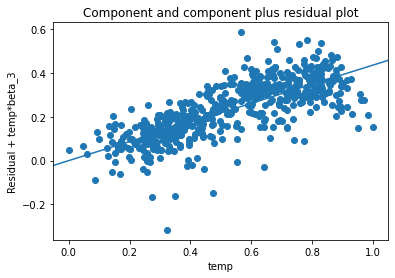

In [61]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model14, 'temp')
plt.show()

Linearity can be seen above. So, moving further

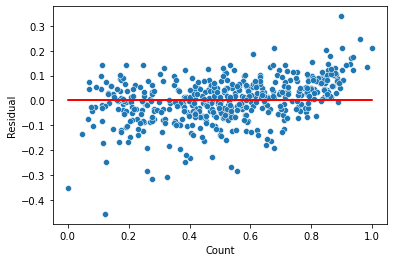

In [62]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model14.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Homoscedasticity is present. So, lets move further

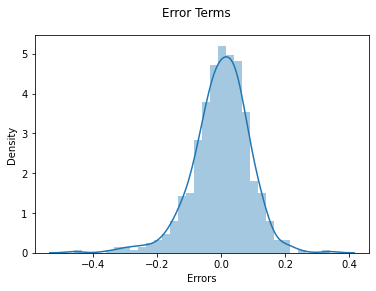

In [63]:
# Normality of Errors
y_train_pred = lr_model14.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

Errors are normally distributed

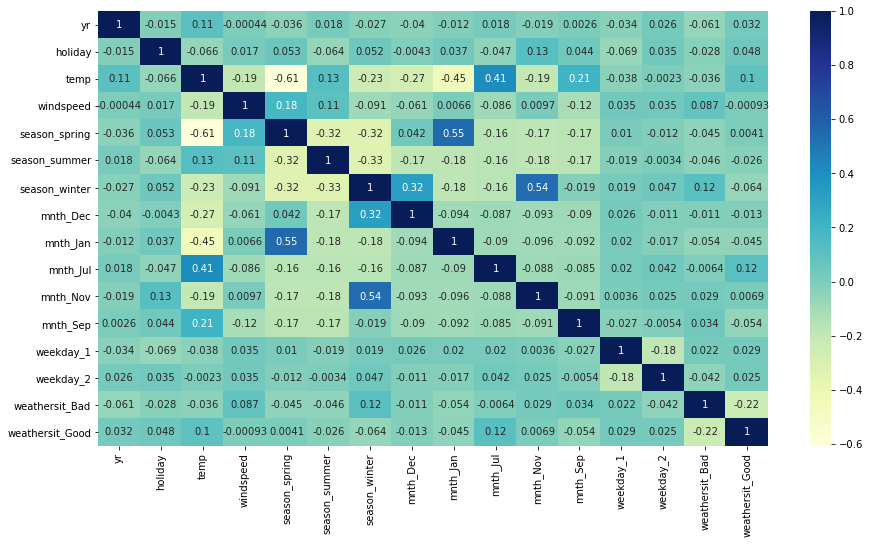

In [64]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

# Now lets make predictions

In [65]:
# Scaling the Test Dataset with the Scaler of the Training Set
cols = df_test.columns
df_test[cols] = Scaler.transform(df_test[cols])

In [66]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test


In [80]:
# Adding the constant column
X_test_m14 = sm.add_constant(X_test)
# Removing all the columns which has been removed from Model 14
X_test_m14 = X_test_m14.drop(['hum','mnth_Feb','mnth_Mar','mnth_May',
                              'mnth_Jun','mnth_Aug','mnth_Oct','atemp',
                              'weekday_6','weekday_3','weekday_4','weekday_5','workingday' ], axis=1)

In [81]:
# Making prediction using Model 14
y_test_pred = lr_model14.predict(X_test_m14)

# Model evaluation

Text(0, 0.5, 'y_test_pred')

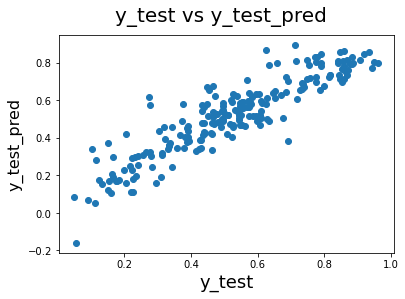

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

In [83]:
# As asked in problem statement
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8187298025708216

$ cnt = 0.1718 + 0.2344  \times  yr - 0.0938  \times  holiday + 0.4362 \times temp - 0.1536 \times windspeed - 0.0708 \times season_spring + 0.0357 \times season_summer + 0.0901 \times season_winter - 0.0438 \times mnth_Dec - 0.0499 \times mnth_Jan - 0.0456 \times mnth_Jul - 0.0406 \times mnth_Nov +0.0692 \times mnth_sep - 0.0263 \times weekday_1 - 0.0317 \times weekday_2 - 0.2139 \times weathersit_Bad + 0.0811 \times weathersit_Good$

Bookings are more on good weather days with high temperature. So, the company should provide more availability of bikes this time. R- Squared value is 0.82, so our test is a good predictor.
